## Classification (ComplementNB dan Logistic Regression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as ran
import seaborn as sns
dataset = pd.read_csv('fifa20.csv')

### Data preparation

In [2]:
#Memilih feature yang akan digunakan
dataset = pd.DataFrame(dataset, columns=['sofifa_id','short_name','age','overall','potential', 'value_eur', 'wage_eur','international_reputation'])

#jumlah data lama
print('Jumlam data lama =',dataset.shape)

Jumlam data lama = (18278, 8)


In [3]:
#Mengecek apakah data ada yang miss, dengan melihat jumlah count ada yang missing atau tidak
df2 = dataset[['sofifa_id','short_name','age','overall','potential', 'value_eur', 'wage_eur','international_reputation']]
df2.describe()

,sofifa_id,age,overall,potential,value_eur,wage_eur,international_reputation
count,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000
mean,219738.864482,25.283291,66.244994,71.546887,2.484038e+06,9456.942773,1.103184
std,27960.200461,4.656964,6.949953,6.139669,5.585481e+06,21351.714095,0.378861
min,768.000000,16.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000
25%,204445.500000,22.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000
50%,226165.000000,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000
75%,240795.750000,29.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000
max,252905.000000,42.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000


In [4]:
# Mengubah 5 label international_popularity menjadi 3 label rate
def rate(x):
    if x >= 4:
        x = 'High'
    elif x >= 2:
        x = 'Mid'
    elif x <= 1:
        x = 'Low'
    return x

In [5]:
# Memasukkan label rate ke dataframe
# Load sedikit lama
a = dataset['sofifa_id'].count()
for i in range(a):
    df2.loc[i, 'rate'] = rate(dataset.loc[i, 'international_reputation'])

In [6]:
# Mengecek jumlah data pada label
# df2.groupby('international_reputation').count()
df2.groupby('international_reputation').count()

,sofifa_id,short_name,age,overall,potential,value_eur,wage_eur,rate
international_reputation,,,,,,,,
1,16794,16794,16794,16794,16794,16794,16794,16794
2,1140,1140,1140,1140,1140,1140,1140,1140
3,292,292,292,292,292,292,292,292
4,46,46,46,46,46,46,46,46
5,6,6,6,6,6,6,6,6


In [7]:
df2.groupby('rate').count()

,sofifa_id,short_name,age,overall,potential,value_eur,wage_eur,international_reputation
rate,,,,,,,,
High,52,52,52,52,52,52,52,52
Low,16794,16794,16794,16794,16794,16794,16794,16794
Mid,1432,1432,1432,1432,1432,1432,1432,1432


### Data Cleansing

In [8]:
# Menghapus Missing Data
df2.dropna()
df2 = df2[(df2[['age', 'overall','potential', 'value_eur', 'wage_eur','international_reputation']] > 0).all(axis=1)] 

#jumlah data baru setelah di cleansing
print('Jumlah data baru =',df2.shape)

Jumlah data baru = (18028, 9)


In [9]:
# Mengecek apakah jumlah row data sudah sama dan tidak ada yang null
print(df2.isnull().sum())
print(df2.info())

sofifa_id                   0
short_name                  0
age                         0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
international_reputation    0
rate                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18028 entries, 0 to 18277
Data columns (total 9 columns):
sofifa_id                   18028 non-null int64
short_name                  18028 non-null object
age                         18028 non-null int64
overall                     18028 non-null int64
potential                   18028 non-null int64
value_eur                   18028 non-null int64
wage_eur                    18028 non-null int64
international_reputation    18028 non-null int64
rate                        18028 non-null object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB
None


### Data Correlation

,sofifa_id,age,overall,potential,value_eur,wage_eur,international_reputation
sofifa_id,1.000000,-0.747363,-0.452405,0.042705,-0.162178,-0.230808,-0.359883
age,-0.747363,1.000000,0.466421,-0.262867,0.088118,0.158031,0.259387
overall,-0.452405,0.466421,1.000000,0.645605,0.645679,0.580355,0.478322
potential,0.042705,-0.262867,0.645605,1.000000,0.584658,0.478382,0.343536
value_eur,-0.162178,0.088118,0.645679,0.584658,1.000000,0.857719,0.624494
wage_eur,-0.230808,0.158031,0.580355,0.478382,0.857719,1.000000,0.658280
international_reputation,-0.359883,0.259387,0.478322,0.343536,0.624494,0.658280,1.000000


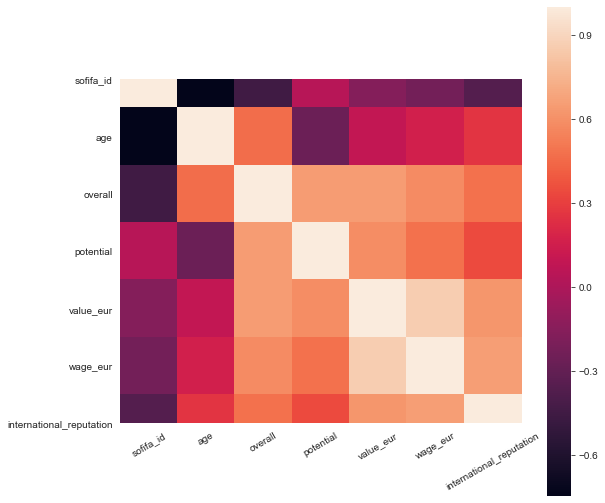

In [10]:
#mengecek korelasi setiap feature 
corr = df2.select_dtypes(include = ['int64', 'float64']).iloc[:,:].corr()
sns.set_style("white")
plt.figure(figsize= (9,9))
az = sns.heatmap(corr, vmax = 1, square =True)
plt.xticks(rotation = 30)
plt.yticks(rotation = 0)

df2.corr()

In [11]:
newdata = pd.DataFrame(df2, columns=['potential', 'overall', 'rate'])

## Menyimpan data kasifikasi

In [12]:
# Hasil Data Explorasi 
newdata.to_csv('fifa20_explore.csv')

In [13]:
## Mengambil nilai atau values dari newdata untuk klasifikasi
# newdf1 = np.array(pd.DataFrame(newdata, columns=['potential', 'overall']))
# newdf2 = np.array(pd.DataFrame(newdata, columns=['rate']))
# newdf2 = newdf2[:, 0]
newdf1 = newdata.iloc[:, [0,1]].values
newdf2 = newdata.iloc[:, 2].values


# ComplementNB

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf1, newdf2, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
ComplementNB()

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [16]:
hasil = clf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
matriks = confusion_matrix(y_test, hasil)
print(sum(matriks[0] + matriks[1] +matriks[2]))
matriks

3606


array([[   0,    0,   11],
       [   0, 1854, 1467],
       [   0,   17,  257]], dtype=int64)

In [18]:
akurasi = sum(matriks.diagonal()) / sum(matriks[0] + matriks[1] + matriks[2])
print("Akurasi: ", akurasi)

Akurasi:  0.5854132002218525


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        11
         Low       0.99      0.56      0.71      3321
         Mid       0.15      0.94      0.26       274

    accuracy                           0.59      3606
   macro avg       0.38      0.50      0.32      3606
weighted avg       0.92      0.59      0.68      3606



C:\Users\FX553VD\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic regression

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf1, newdf2, test_size = 0.2, random_state = 0)

In [21]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [22]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



C:\Users\FX553VD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FX553VD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
hasil = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
matriks = confusion_matrix(y_test, hasil)
print(sum(matriks[0] + matriks[1] +matriks[2]))
matriks

3606


array([[   0,    0,   11],
       [   0, 3273,   48],
       [   0,  148,  126]], dtype=int64)

In [26]:
akurasi = sum(matriks.diagonal()) / sum(matriks[0] + matriks[1] + matriks[2])
print("Akurasi: ", akurasi)

Akurasi:  0.9425956738768719


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        11
         Low       0.96      0.99      0.97      3321
         Mid       0.68      0.46      0.55       274

    accuracy                           0.94      3606
   macro avg       0.55      0.48      0.51      3606
weighted avg       0.93      0.94      0.94      3606



C:\Users\FX553VD\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
